<a href="https://colab.research.google.com/github/efemeryczny/network_analysis/blob/main/network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyvis.network import Network

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
excel_file_path = '/content/drive/MyDrive/Colab Notebooks/wig_dane/wig_dane_full.xlsx'
data = pd.read_excel(excel_file_path)
data.to_csv('wig_dane.csv', index=False)



In [8]:
wig_dane = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wig_dane/wig_dane.csv')
wig_dane

,Lp,shareholder,ownership,number_of_shares,Ostatnia zmiana,value,wza_ownership,Liczba gĹ‚osĂłw,Ostatnia zmiana.1,Data aktualizacji,ticker,spolka
0,1,PZU SA,31.91%,41658850.0,0.0,1.81 mld,31.91%,41658850.0,0.0,2022-11-04 00:00:00,ALR,ALIOR
1,2,OFE Nationale-Nederlanden,9.34%,12196509.0,-198000.0,531 mln,9.34%,12196509.0,-198000.0,2022-12-30 00:00:00,ALR,ALIOR
2,3,OFE Allianz Polska,8.83%,11526440.0,9607180.0,502 mln,8.83%,11526440.0,9607180.0,2023-05-16 00:00:00,ALR,ALIOR
3,4,OFE PKO BP Bankowy,4.76%,6209081.0,70943.0,270 mln,4.76%,6209081.0,70943.0,2022-12-30 00:00:00,ALR,ALIOR
4,5,OFE NNLife,3.45%,4502562.0,0.0,196 mln,3.45%,4502562.0,0.0,2022-12-30 00:00:00,ALR,ALIOR
...,...,...,...,...,...,...,...,...,...,...,...,...
1947,9,TFI Santander SA,0.05%,24232.0,0.0,521 tys,0.05%,24232.0,0.0,2022-12-31 00:00:00,ZEP,ZEPAK
1948,10,TFI BNP Paribas SA,0.04%,21692.0,0.0,466 tys,0.04%,21692.0,0.0,2022-12-31 00:00:00,ZEP,ZEPAK
1949,11,TFI Uniqa SA,0.01%,6429.0,-10775.0,138 tys,0.01%,6429.0,-10775.0,2022-12-31 00:00:00,ZEP,ZEPAK
1950,12,TFI PZU SA,0.01%,5900.0,0.0,127 tys,0.01%,5900.0,0.0,2022-12-31 00:00:00,ZEP,ZEPAK


In [9]:
wigdane = wig_dane.drop_duplicates()
all_data = wigdane.rename(columns={'value': 'Value'})
# print(combined_table.columns)

all_data['Value'] = all_data['Value'].str.replace('mld','000000000').str.replace('mln','000000').str.replace('tys', '000').str.replace('.', '').str.replace(',', '').str.replace(' ', '')
all_data['Value'] = all_data['Value'].astype(int)

all_data

<ipython-input-9-4d821d551b73>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  all_data['Value'] = all_data['Value'].str.replace('mld','000000000').str.replace('mln','000000').str.replace('tys', '000').str.replace('.', '').str.replace(',', '').str.replace(' ', '')


,Lp,shareholder,ownership,number_of_shares,Ostatnia zmiana,Value,wza_ownership,Liczba gĹ‚osĂłw,Ostatnia zmiana.1,Data aktualizacji,ticker,spolka
0,1,PZU SA,31.91%,41658850.0,0.0,181000000000,31.91%,41658850.0,0.0,2022-11-04 00:00:00,ALR,ALIOR
1,2,OFE Nationale-Nederlanden,9.34%,12196509.0,-198000.0,531000000,9.34%,12196509.0,-198000.0,2022-12-30 00:00:00,ALR,ALIOR
2,3,OFE Allianz Polska,8.83%,11526440.0,9607180.0,502000000,8.83%,11526440.0,9607180.0,2023-05-16 00:00:00,ALR,ALIOR
3,4,OFE PKO BP Bankowy,4.76%,6209081.0,70943.0,270000000,4.76%,6209081.0,70943.0,2022-12-30 00:00:00,ALR,ALIOR
4,5,OFE NNLife,3.45%,4502562.0,0.0,196000000,3.45%,4502562.0,0.0,2022-12-30 00:00:00,ALR,ALIOR
...,...,...,...,...,...,...,...,...,...,...,...,...
1947,9,TFI Santander SA,0.05%,24232.0,0.0,521000,0.05%,24232.0,0.0,2022-12-31 00:00:00,ZEP,ZEPAK
1948,10,TFI BNP Paribas SA,0.04%,21692.0,0.0,466000,0.04%,21692.0,0.0,2022-12-31 00:00:00,ZEP,ZEPAK
1949,11,TFI Uniqa SA,0.01%,6429.0,-10775.0,138000,0.01%,6429.0,-10775.0,2022-12-31 00:00:00,ZEP,ZEPAK
1950,12,TFI PZU SA,0.01%,5900.0,0.0,127000,0.01%,5900.0,0.0,2022-12-31 00:00:00,ZEP,ZEPAK


In [35]:
G = nx.from_pandas_edgelist(all_data, 'shareholder', 'ticker', edge_attr=True)

In [11]:
edgelist = nx.to_edgelist(G)

In [ ]:
#[v[2]['Value']/10_000_000_00 for v in edgelist]

In [12]:
colors = ['red' if node in wigdane['ticker'].values else 'blue' for node in G]

In [ ]:
#[v * 100 for v in dict(G.degree()).values()]

In [13]:
pos = nx.spring_layout(G, k=0.3)  # Adjust the 'k' parameter to control node spacing

# Update node positions
nx.set_node_attributes(G, pos, 'pos')

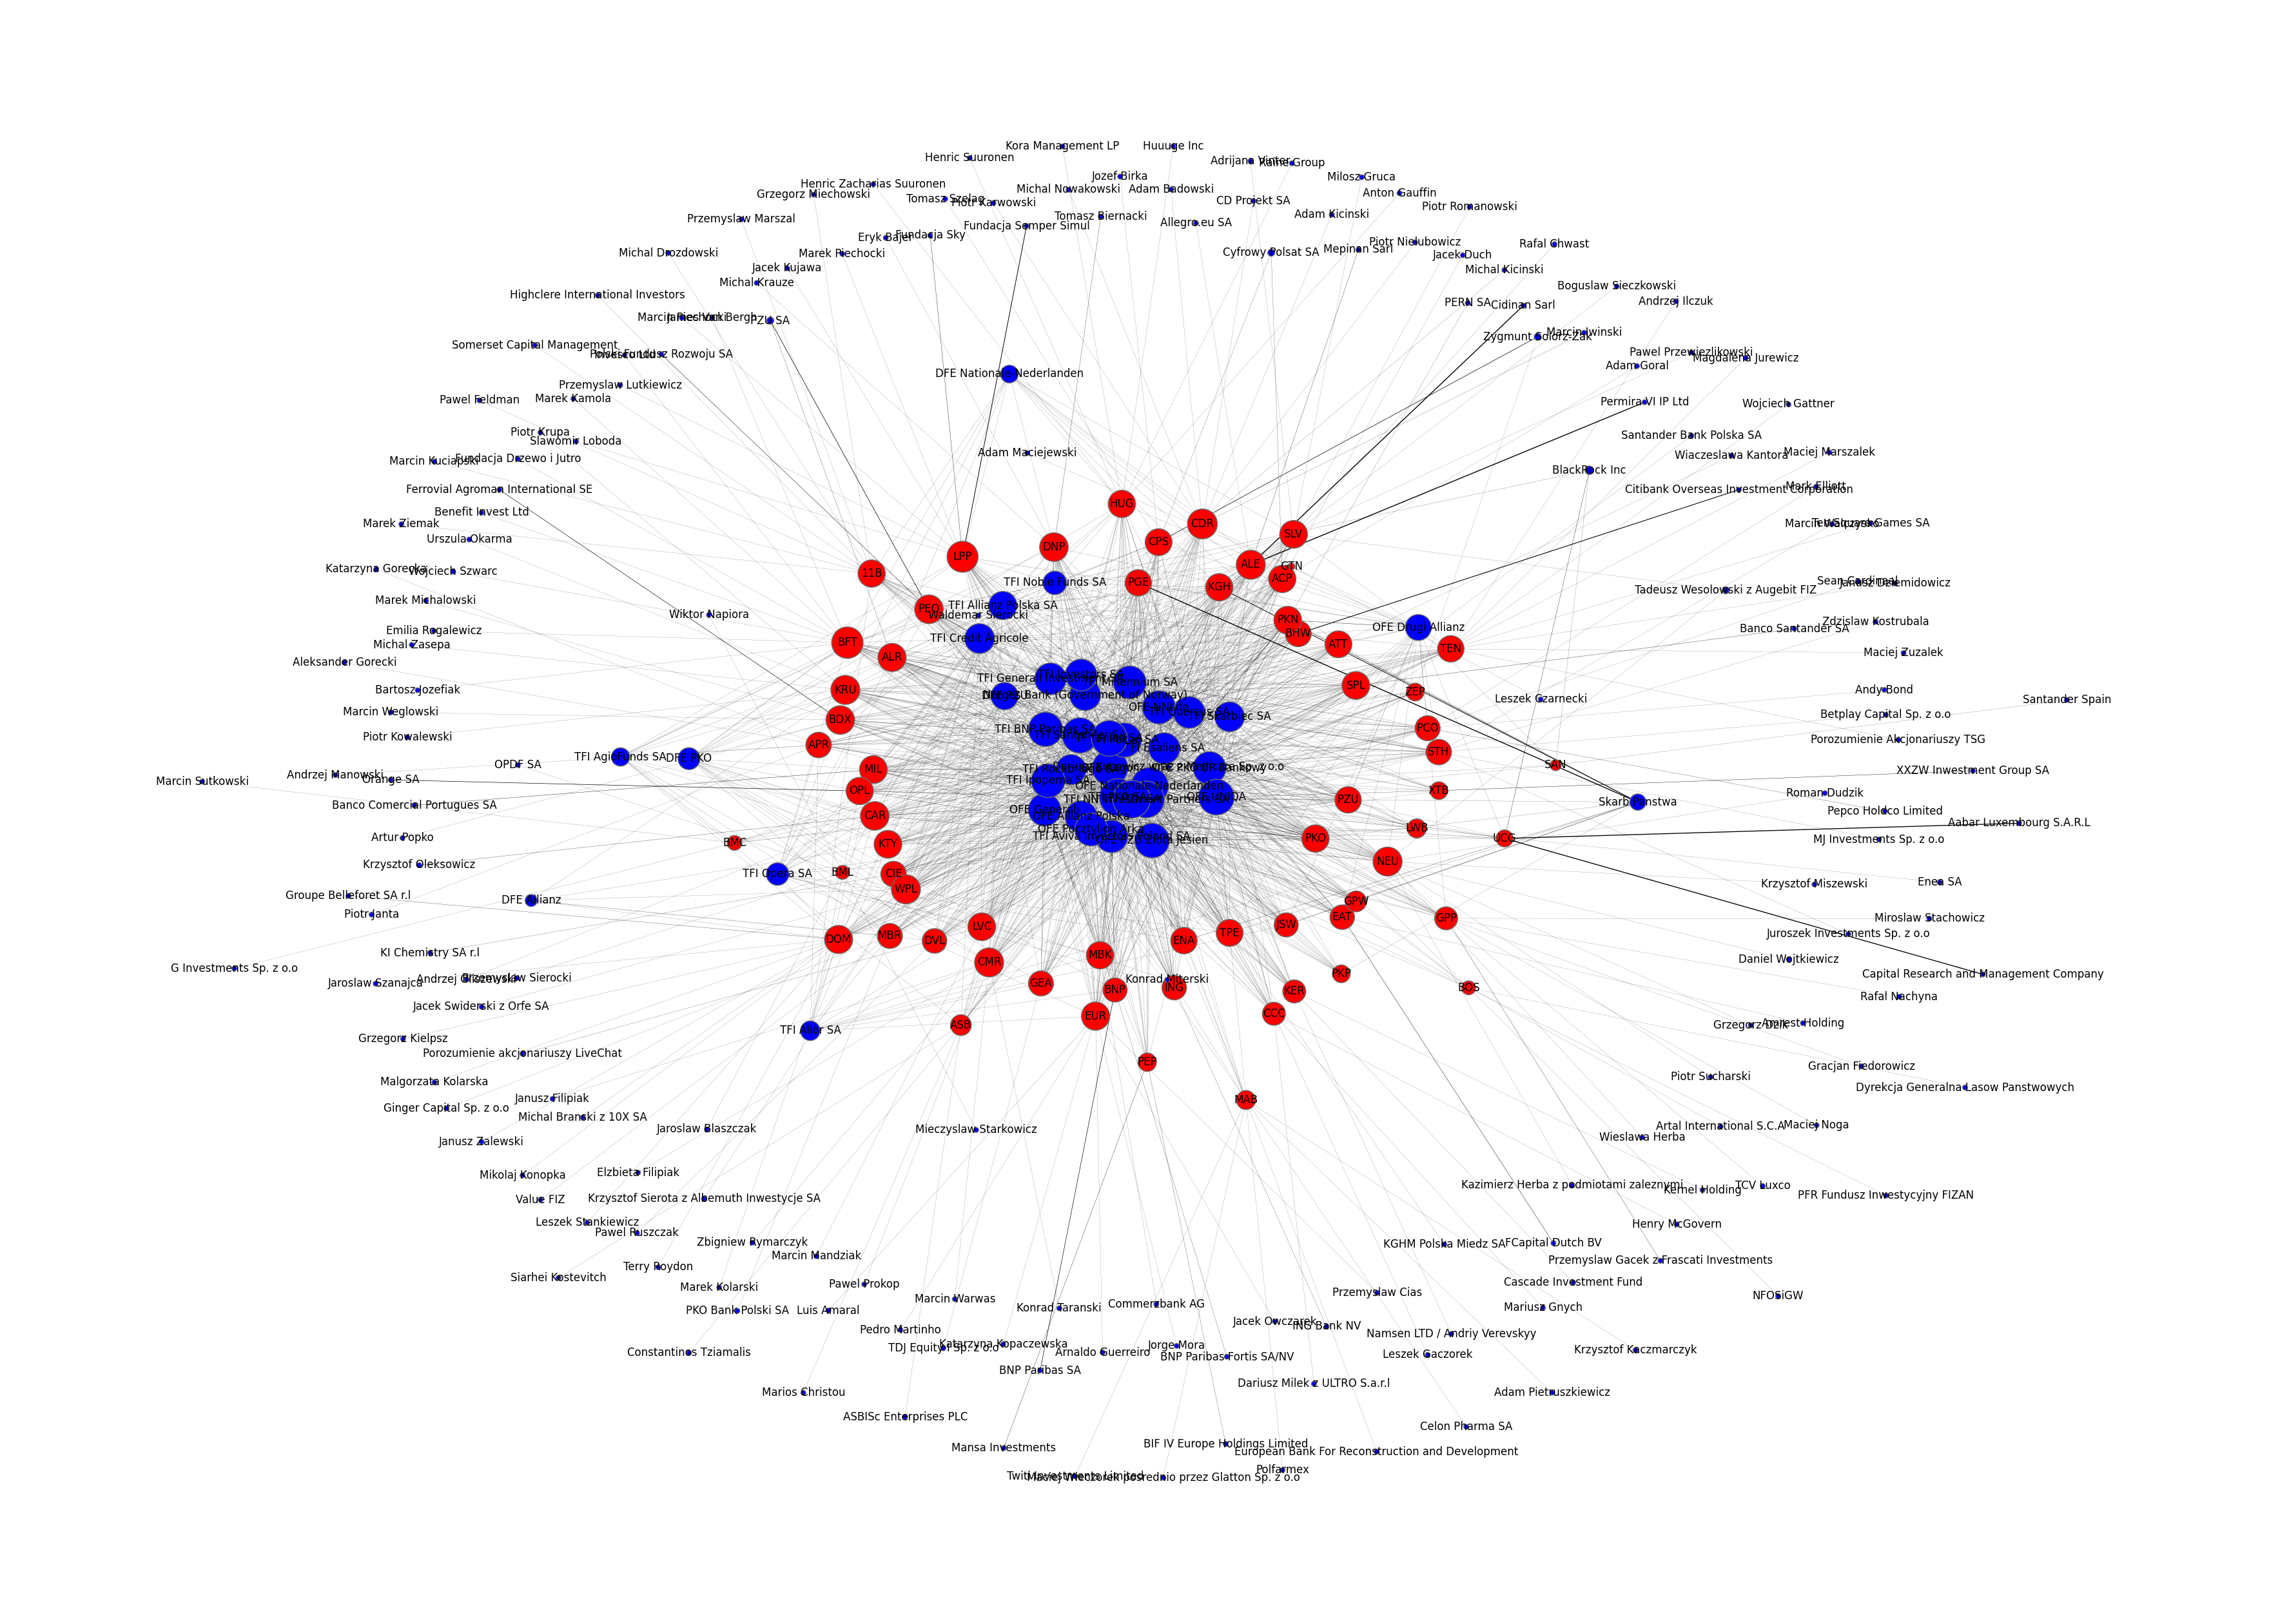

In [24]:
plt.figure(figsize=(35, 25))
min_value=0.1
nx.draw_kamada_kawai(G, with_labels=True, node_color=colors, 
        node_size = [v * 30 for v in dict(G.degree()).values()],
        width=[max(v[2]['Value']/1000000000000, min_value) for v in edgelist],
        edgecolors='#696969')
plt.show()

In [38]:
dict(G.degree())

{'PZU SA': 2,
 'ALR': 33,
 'OFE Nationale-Nederlanden': 58,
 'OFE Allianz Polska': 43,
 'OFE PKO BP Bankowy': 45,
 'OFE NNLife': 46,
 'OFE Aegon': 53,
 'OFE Generali': 44,
 'OFE UNIQA': 53,
 'TFI NN Investment Partners SA': 56,
 'TFI Aviva Investors Poland SA': 44,
 'TFI Santander SA': 52,
 'TFI PKO SA': 58,
 'OFE Pocztylion Arka': 45,
 'TFI Esaliens SA': 41,
 'Norges Bank (Government of Norway)': 40,
 'TFI Pekao SA': 49,
 'TFI Allianz Polska SA': 33,
 'TFI PZU SA': 59,
 'TFI Skarbiec SA': 37,
 'TFI Uniqa SA': 53,
 'TFI Generali Investment SA': 42,
 'TFI Millennium SA': 45,
 'TFI Investors SA': 42,
 'TFI Opera SA': 21,
 'TFI Rockbridge SA': 38,
 'TFI Quercus SA': 42,
 'TFI BNP Paribas SA': 49,
 'DFE PKO': 20,
 'TFI AgioFunds SA': 14,
 'TFI Ipopema SA': 47,
 'TFI Noble Funds SA': 23,
 'TFI Credit Agricole': 37,
 'DFE Nationale-Nederlanden': 13,
 'Citibank Overseas Investment Corporation': 1,
 'BHW': 28,
 'OFE Drugi Allianz': 28,
 'OFE PZU Zlota Jesien': 50,
 'BNP Paribas SA': 1,
 'BNP':